In [129]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from wordcloud import WordCloud
import pandas as pd
import numpy as np
df = pd.read_csv('TM - Neg.csv')

In [130]:
data = df['Tweets'].values.tolist() 
raw_documents = []
snippets = []
for line in data:
    text = line.strip() 
    raw_documents.append(text) 
    snippets.append(text[0:min(len(text), 100)])
    print("Read %d raw text documents" % len(raw_documents))


Read 1 raw text documents
Read 2 raw text documents
Read 3 raw text documents
Read 4 raw text documents
Read 5 raw text documents
Read 6 raw text documents
Read 7 raw text documents
Read 8 raw text documents
Read 9 raw text documents
Read 10 raw text documents
Read 11 raw text documents
Read 12 raw text documents
Read 13 raw text documents
Read 14 raw text documents
Read 15 raw text documents
Read 16 raw text documents
Read 17 raw text documents
Read 18 raw text documents
Read 19 raw text documents
Read 20 raw text documents
Read 21 raw text documents
Read 22 raw text documents
Read 23 raw text documents
Read 24 raw text documents
Read 25 raw text documents
Read 26 raw text documents
Read 27 raw text documents
Read 28 raw text documents
Read 29 raw text documents
Read 30 raw text documents
Read 31 raw text documents
Read 32 raw text documents
Read 33 raw text documents
Read 34 raw text documents
Read 35 raw text documents
Read 36 raw text documents
Read 37 raw text documents
Read 38 ra

Read 499 raw text documents
Read 500 raw text documents
Read 501 raw text documents
Read 502 raw text documents
Read 503 raw text documents
Read 504 raw text documents
Read 505 raw text documents
Read 506 raw text documents
Read 507 raw text documents
Read 508 raw text documents
Read 509 raw text documents
Read 510 raw text documents
Read 511 raw text documents
Read 512 raw text documents
Read 513 raw text documents
Read 514 raw text documents
Read 515 raw text documents
Read 516 raw text documents
Read 517 raw text documents
Read 518 raw text documents
Read 519 raw text documents
Read 520 raw text documents
Read 521 raw text documents
Read 522 raw text documents
Read 523 raw text documents
Read 524 raw text documents
Read 525 raw text documents
Read 526 raw text documents
Read 527 raw text documents
Read 528 raw text documents
Read 529 raw text documents
Read 530 raw text documents
Read 531 raw text documents
Read 532 raw text documents
Read 533 raw text documents
Read 534 raw text do

In [131]:
custom_stop_words = []
with open("dataset/id.stopwords.02.01.2016.txt", "r") as fin:
    for line in fin.readlines(): 
        custom_stop_words.append(line.strip())
        print("Stopword list has %d entries" % len(custom_stop_words))

Stopword list has 1 entries
Stopword list has 2 entries
Stopword list has 3 entries
Stopword list has 4 entries
Stopword list has 5 entries
Stopword list has 6 entries
Stopword list has 7 entries
Stopword list has 8 entries
Stopword list has 9 entries
Stopword list has 10 entries
Stopword list has 11 entries
Stopword list has 12 entries
Stopword list has 13 entries
Stopword list has 14 entries
Stopword list has 15 entries
Stopword list has 16 entries
Stopword list has 17 entries
Stopword list has 18 entries
Stopword list has 19 entries
Stopword list has 20 entries
Stopword list has 21 entries
Stopword list has 22 entries
Stopword list has 23 entries
Stopword list has 24 entries
Stopword list has 25 entries
Stopword list has 26 entries
Stopword list has 27 entries
Stopword list has 28 entries
Stopword list has 29 entries
Stopword list has 30 entries
Stopword list has 31 entries
Stopword list has 32 entries
Stopword list has 33 entries
Stopword list has 34 entries
Stopword list has 35 en

In [132]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer(stop_words=custom_stop_words,
                             min_df=0)
A = vectorizer.fit_transform(raw_documents)
print("Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]))

Created 1336 X 3035 document-term matrix


c:\program files\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [133]:
terms = vectorizer.get_feature_names() 
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 3035 distinct terms


In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(stop_words=custom_stop_words,
min_df=0)
A = vectorizer.fit_transform(raw_documents)
print("Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]))


Created 1336 X 3035 TF-IDF-normalized document-term matrix


In [135]:
terms = vectorizer.get_feature_names() 
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 3035 distinct terms


In [136]:
import joblib
joblib.dump((A,terms,snippets), "articles-raw-nmf-neg.pkl")

['articles-raw-nmf-neg.pkl']

In [137]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 3035 distinct terms


In [138]:
import operator
def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [139]:
ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking[0:10] ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )

01. bahaya (126.37)
02. vape (125.95)
03. rokok (119.86)
04. elektrik (64.52)
05. aman (41.90)
06. haram (38.97)
07. kalo (34.52)
08. sehat (31.68)
09. orang (26.60)
10. paru (24.89)


In [140]:
joblib.dump((A,terms,snippets), "articles-tfidf-nmf-neg.pkl")


['articles-tfidf-nmf-neg.pkl']

In [141]:
(A,terms,snippets) = joblib.load( "articles-tfidf-nmf-neg.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 1336 X 3035 document-term matrix


In [142]:
k = 10
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

In [143]:
W.shape

(1336, 10)

In [146]:

W[0,:].round(2)

array([0.03, 0.  , 0.01, 0.01, 0.02, 0.  , 0.  , 0.  , 0.02, 0.03])

In [147]:
H.shape


(10, 3035)

In [148]:
term_index = terms.index('vape')
# round to 2 decimal places for display purposes
H[:,term_index].round(2)


array([2.03, 0.  , 0.31, 0.6 , 0.  , 0.02, 0.  , 0.05, 0.04, 0.36])

In [149]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [150]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: bahaya, vape, rokok, hisap, pod, kak, mending, baca, sayang, salah
Topic 02: rokok, elektrik, konvensional, bahaya, tembakau, henti, milik, yuk, nama, kemenkes
Topic 03: haram, fatwa, vape, muhammadiyah, tuju, netflix, hisap, halal, hukum, orang
Topic 04: aman, vape, bilang, rokok, untung, tembakau, liquid, baca, klaim, ganti
Topic 05: kalo, orang, bilang, ngerokok, asep, mending, gue, ngevape, roko, pakai
Topic 06: sehat, kandung, zat, nikotin, kimia, bahan, tubuh, hidup, temu, salah
Topic 07: asap, okok, pasif, hirup, aktif, nama, enak, knalpot, aroma, bahaya
Topic 08: tau, gue, kasih, teman, lho, ngevape, konvensional, mengasih, oh, pakai
Topic 09: paru, sakit, masuk, dokter, kena, ketimbang, kanker, sayang, ledak, bikin
Topic 10: larang, tuju, perintah, indonesia, vape, konsumsi, edar, negara, bagus, idi


In [151]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [152]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

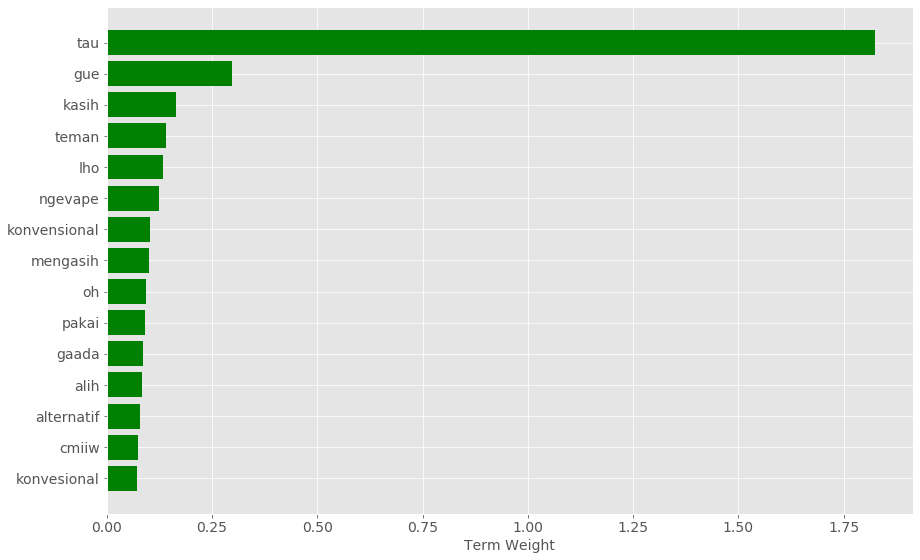

In [153]:
plot_top_term_weights( terms, H, 7, 15 )


In [154]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets


In [155]:
topic_snippets = get_top_snippets( snippets, W, 8, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. dokter paru ingat bahaya rokok elektrik vape guna potensi kena sakit paru
02. vape aman masuk paru paru asep
03. vape rokok bahaya vape karena asap masuk paru paru ketimbang rokok
04. gapapa sayang paru paru vape rokok bahaya
05. bagaimana nder vape bahaya rokok sih jadi mending larang sayang paru paru
06. bahaya vape candu sakit paru
07. bahaya rokok bikin kanker paru kalo vape bikin paru basah
08. bahaya vape ledak kena pneumonia rokok kena paru paru jantung dll
09. dokter paru vape bahaya ketimbang rokok
10. vape bahaya tiada filter paru paru so rokok better


In [156]:
topic_snippets = get_top_snippets( snippets, W, 3, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. vape enggak aman rokok
02. vape enggak aman rokok
03. vape aman nge-vape
04. deh kalo bilang vape aman atau rokok konvensional aman enggak aman aman wey
05. bahaya vape enggak aman rokok
06. vape aman rokok bahaya
07. vape enggak aman sehat
08. untung enggak vape aman
09. orang dapat vape aman rokok tembakau
10. untung rokok aman


In [157]:
(A,terms,snippets) = joblib.load( "articles-tfidf-nmf-neg.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 1336 X 3035 document-term matrix


In [158]:
kmin, kmax = 3, 100
from sklearn import decomposition
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k, max_iter=1000) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...
Applying NMF for k=21 ...
Applying NMF for k=22 ...
Applying NMF for k=23 ...
Applying NMF for k=24 ...
Applying NMF for k=25 ...
Applying NMF for k=26 ...
Applying NMF for k=27 ...
Applying NMF for k=28 ...
Applying NMF for k=29 ...
Applying NMF for k=30 ...
Applying NMF for k=31 ...
Applying NMF for k=32 ...
Applying NMF for k=33 ...
Applying NMF for k=34 ...
Applying NMF for k=35 ...
Applying NMF for k=36 ...
Applying NMF for k=37 ...
Applying NMF for k=38 ...
Applying NMF for k=39 ...
Applying NMF for k=40 ...
Applying NMF for k=

In [159]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [160]:
import gensim
docgen = TokenGenerator( raw_documents, custom_stop_words )
# the model has 500 dimensions, the minimum document-term frequency is 20
w2v_model = gensim.models.Word2Vec(docgen, size=500, min_count=20, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [161]:
print( "Model has %d terms" % len(w2v_model.wv.vocab) )


Model has 96 terms


In [162]:
w2v_model.save("w2v-model-neg.bin")


In [163]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            try: 
                pair_scores.append(w2v_model.wv.similarity(pair[0], pair[1]) )
            except KeyError as e:
                pair_scores.append(0.5)
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [164]:
import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [165]:
from itertools import combinations
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=03: Coherence=0.9369
K=04: Coherence=0.9276
K=05: Coherence=0.9043
K=06: Coherence=0.8887
K=07: Coherence=0.8665
K=08: Coherence=0.8721
K=09: Coherence=0.8493
K=10: Coherence=0.8454
K=11: Coherence=0.8191
K=12: Coherence=0.7999
K=13: Coherence=0.7845
K=14: Coherence=0.7745
K=15: Coherence=0.7592
K=16: Coherence=0.7763
K=17: Coherence=0.7522
K=18: Coherence=0.7314
K=19: Coherence=0.7181
K=20: Coherence=0.7166
K=21: Coherence=0.7200
K=22: Coherence=0.7105
K=23: Coherence=0.6898
K=24: Coherence=0.6828
K=25: Coherence=0.6839
K=26: Coherence=0.6752
K=27: Coherence=0.6633
K=28: Coherence=0.6599
K=29: Coherence=0.6616
K=30: Coherence=0.6414
K=31: Coherence=0.6362
K=32: Coherence=0.6333
K=33: Coherence=0.6306
K=34: Coherence=0.6398
K=35: Coherence=0.6222
K=36: Coherence=0.6135
K=37: Coherence=0.6177
K=38: Coherence=0.6105
K=39: Coherence=0.5960
K=40: Coherence=0.6000
K=41: Coherence=0.5913
K=42: Coherence=0.5883
K=43: Coherence=0.5871
K=44: Coherence=0.5800
K=45: Coherence=0.5884
K=46: Coher

In [167]:
import pandas as pd
clean_df = pd.DataFrame(coherences)
clean_df.to_csv("coherence_nmfneg.csv")

In [168]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

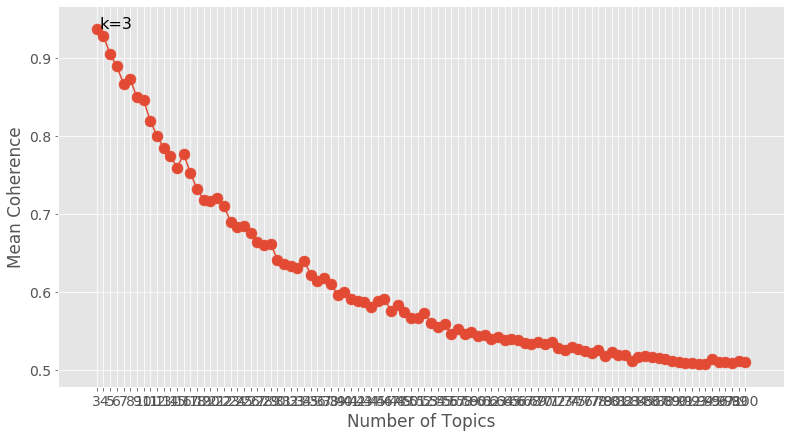

In [169]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [170]:
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [171]:
for topic_index in range(k):
    descriptor = get_descriptor( terms, H, topic_index, 10 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: bahaya, vape, rokok, kalo, tau, paru, orang, bilang, hisap, mending
Topic 02: rokok, elektrik, konvensional, aman, asap, sehat, tembakau, bahaya, kandung, okok
Topic 03: haram, fatwa, vape, muhammadiyah, tuju, orang, netflix, halal, hisap, kalo


In [173]:
topic_snippets = get_top_snippets( snippets, W, 2, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. haram
02. haram
03. benar haram
04. vape sudah haram
05. narkoba haram vape haram netflix haram zina haram curi haram halal
06. bahaya sudah rokok vape haram
07. haram haram vape still bahaya
08. fatwa rokok elektrik vape haram
09. hisap haram
10. mabok haram ngewe haram netflix haram vape haram sudah benar baca al-quran nikmat hidup


In [125]:
#Topik 1: vape vs rokok konvensional 
#Topik 2: fatwa haram vape
#Topik 3: vape alternatif rokok
#Topik 4: regulasi cukai vape
#Topik 5: vape tidak bahaya
#Topik 6: pengguna vape --> vape aman, beralih dari konvensional ke vape
#Topik 7: vape vs rokok konvensional
#Topik 8: kandungan vape 

In [174]:
topic_snippets = get_top_snippets( snippets, W, 1, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. tahu vape rokok elektrik macam bahaya rokok
02. bahaya rokok elektrik
03. bahaya rokok elektrik
04. rokok elektrik vape bahaya rokok konvensional
05. rokok elektrik rokok tembakau
06. bahaya vape rokok elektrik
07. rokok elektrik bahaya sehat
08. nama asap rokok konvensional rokok elektrik bahaya
09. rokok elektrik pas rokok zat kimia teliti rokok elektrik aman
10. dokter asap rokok elektrik bahaya rokok konvensional


In [175]:
topic_snippets = get_top_snippets( snippets, W, 0, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. vape lagi bahaya
02. padahal vape bahaya
03. vape tetap bahaya
04. vape juga bahaya
05. tapi vape bahaya
06. vape tapi bahaya
07. vape sudah bahaya
08. dua vape bahaya
09. padahal vape lebih bahaya
10. memang bahaya vape


In [ ]:
kmin, kmax = 3, 100
from sklearn import decomposition
topic_models1 = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying LDA for k=%d ..." % k )
    # run NMF
    model = decomposition.LatentDirichletAllocation(random_state=0,n_components=k, max_iter=1000) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models1.append( (k,W,H) )

Applying LDA for k=3 ...
Applying LDA for k=4 ...
Applying LDA for k=5 ...
Applying LDA for k=6 ...


In [ ]:
from itertools import combinations
k_values1 = []
coherences1 = []
for (k,W,H) in topic_models1:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values1.append( k )
    coherences1.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

In [ ]:
import pandas as pd
clean_df = pd.DataFrame(coherences1)
clean_df.to_csv("coherence_ldaNEG.csv")

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [ ]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values1, coherences1 )
plt.xticks(k_values1)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values1, coherences1, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences1)
xpos = coherences1.index(ymax)
best_k = k_values1[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [ ]:
k1 = best_k
# get the model that we generated earlier.
W1 = topic_models1[k-kmin][1]
H1 = topic_models1[k-kmin][2]

In [ ]:
for topic_index in range(k1):
    descriptor = get_descriptor( terms, H1, topic_index, 10 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )